In [2]:
# 여러분은 A사의 데이터 애널리스트로서, A사 음식점의 매출 데이터를 전달받아 EDA를 진행하려고 한다.
# 데이터는 아래와 같이 받을 수 있으며 total_bill(계산금액), tip(팁 금액), sex(계산자 성별), 
# smoker(테이블에 흡연자 포함여부), day(요일), time(시간대), size(테이블 인원 수)로 구성되어 있다.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tips_dataframe = sns.load_dataset("tips")


# 1.데이터의 정보와 요약통계를 확인하라. (Head&Tail, 데이터 타입, Row&Columns 수, Std, Mean, NaN 수 등등 다다익선)

# 데이터 head
tips_dataframe.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
#기술통계량 산출

tips_dataframe.describe(include="all") 
# 걸럼별 데이터 개수 count
# 데이터 종류의 개수 unipue
# 가장 많은 빈도가 나온 값 top
# top의 빈도 frep
# 평균 mean
# 표준편차 std
# 최솟값 min
# 분위수별 값
# 최댓값 max

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [4]:
# 데이터 타입 확인
tips_dataframe.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [5]:
# 기술통계량이 의미가 없는 sex,smoker,day,time 컬럼을 각각을 value_counts 시킴

# sex 컬럼의 value_counts
sex_value_c=tips_dataframe['sex'].value_counts()
sex_value_c

Male      157
Female     87
Name: sex, dtype: int64

In [6]:
# smoker 컬럼의 value_counts
smoker_count=tips_dataframe['smoker'].value_counts()
smoker_count

No     151
Yes     93
Name: smoker, dtype: int64

In [7]:
# day 컬럼의 value_counts
day_count=tips_dataframe['day'].value_counts()
day_count

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [8]:
# time 컬럼의 value_counts
time_count=tips_dataframe['time'].value_counts()
time_count

Dinner    176
Lunch      68
Name: time, dtype: int64

In [9]:
# 결측치 검색
tips_dataframe.isnull().sum()
# 결측치 없음

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

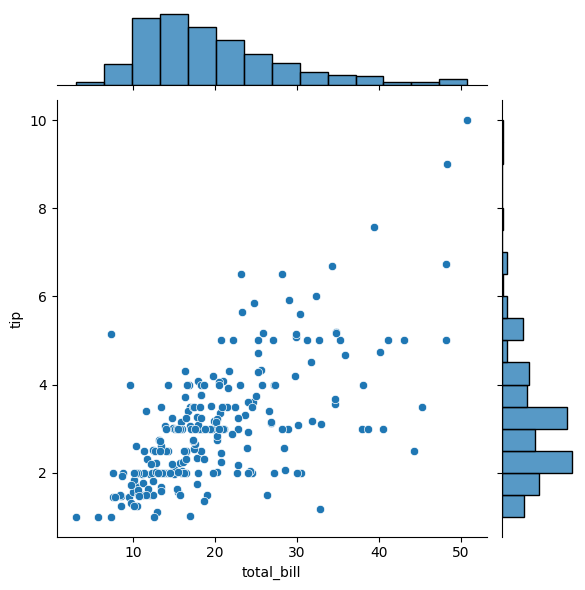

In [10]:
# 2.계산 금액과 팁 금액 사이에 어떠한 상관 관계가 있을 것 같다. 두 변수의 관계를 시각화하여 나타내고, 
# 선형적 관계가 보이는지 회귀선까지 그어서 표시해라.

# 계산금액,팁 금액을의 관계를 산점도로 표현
joinp1=sns.jointplot(x='total_bill',y='tip',kind='scatter',data=tips_dataframe)
plt.show()

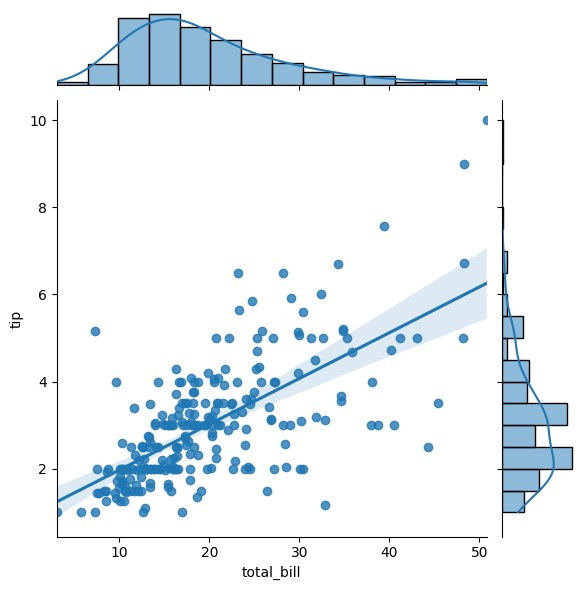

In [11]:
# 산점도에 회귀선 긋기 
joinp1=sns.jointplot(x='total_bill',y='tip',kind='reg',data=tips_dataframe)
plt.show()

# 계산금액과 팁은 선형적 관계를 가지고 있다

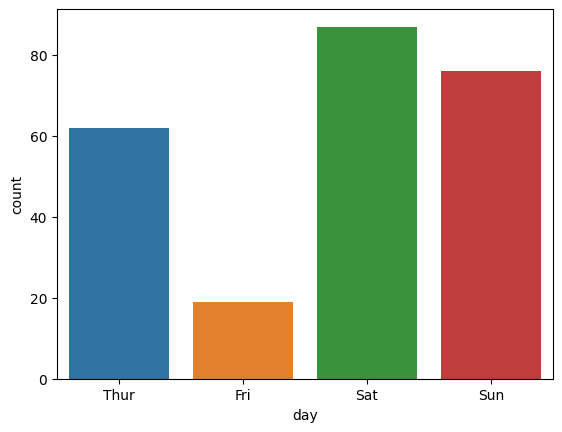

In [12]:
# 2.요일별로 팁의 발생 횟수가 어떻게 다른지를 시각화해서 나타내어 보아라. (Countplot 활용)

# countplot 그리기
count_day=sns.countplot(x=tips_dataframe['day'],data=tips_dataframe)
plt.show()

# 산점도로 요일별로 발생한 팁의 금액 보기 
# 토,일요일이 팁발생 많고 금요일이 가장 적음
# 주말 한정메뉴 추가 

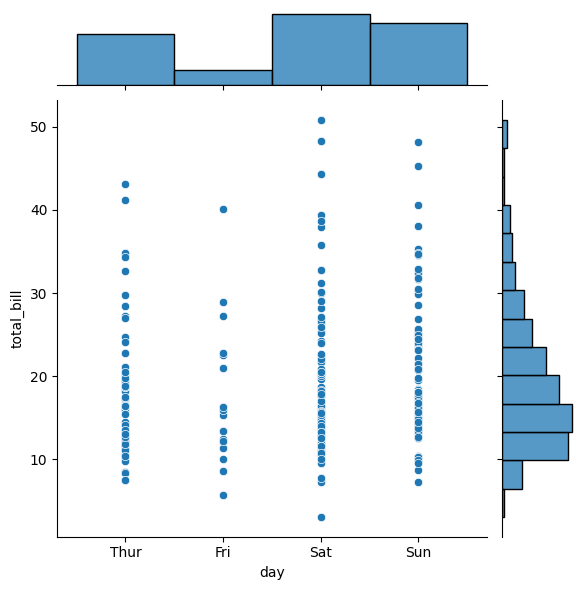

In [13]:
# 3.요일별 계산금액의 통계적 분포를 한눈에 보고싶다. 시각화해서 나타내어 보아라.

# 요일별 계산금액 산점도화
day_bill=sns.jointplot(x='day',y='total_bill',kind='scatter',data=tips_dataframe)
plt.show()
# 계산금액이 10~20원부근에 가장 많이 분포해 있다.

C:\Users\alstj\Anaconda3\envs\data\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\alstj\Anaconda3\envs\data\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alstj\Anaconda3\envs\data\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\alstj\Anaconda3\envs\data\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.

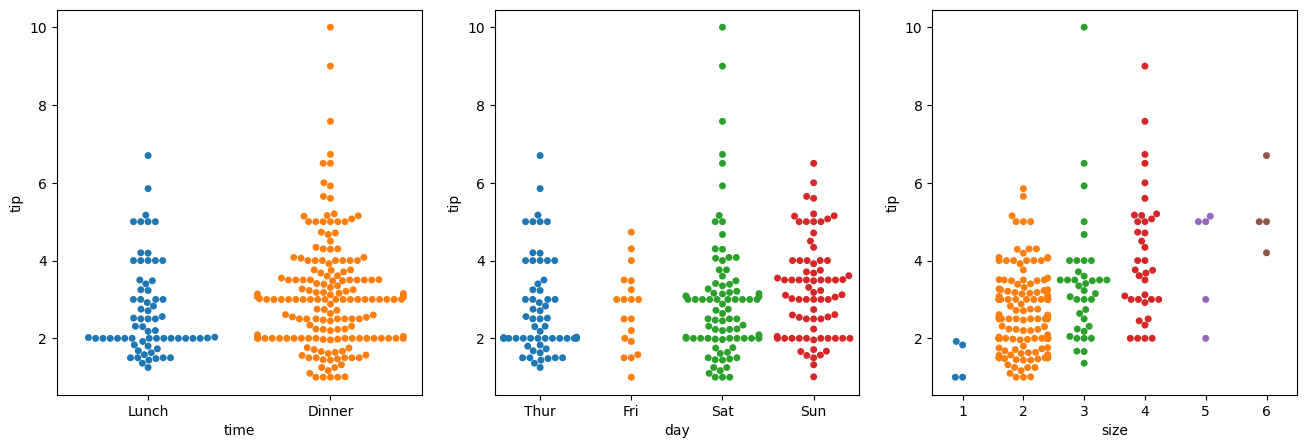

In [25]:
# 4.성별, 시간대, 요일, 테이블 인원수가 팁 금액과 어떠한 관계가 있는지 한눈에 알 수 있도록 시각화하라.

# 그래프 들어갈 자리 3개 만들기
fig,ax=plt.subplots(ncols=3,figsize=(16,5))

# 왼쪽부터 시간대-팁금액,요일-팁금액,테이블 인원수-팁금액 swarmplot그림
sns.swarmplot("time","tip",data=tips_dataframe,ax=ax[0])
sns.swarmplot("day","tip",data=tips_dataframe,ax=ax[1])
sns.swarmplot("size","tip",data=tips_dataframe,ax=ax[2])
fig

# 저녁시간대에 팁 발생빈도 높음 영업시간 데이터를 추가로 분석해 늦은 밤까지 영업을 하면 이윤이 더 생길지 판단

In [34]:
# 5.추가적인 EDA를 진행할 수 있다면 진행하고, 얻어낸 Insight로 음식점의 매출액 혹은 팁 금액을 증대시키기 위한 방안을 제시하라.


# 1. 피어슨 상관계수 분석
tips_dataframe.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


C:\Users\alstj\Anaconda3\envs\data\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\alstj\Anaconda3\envs\data\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


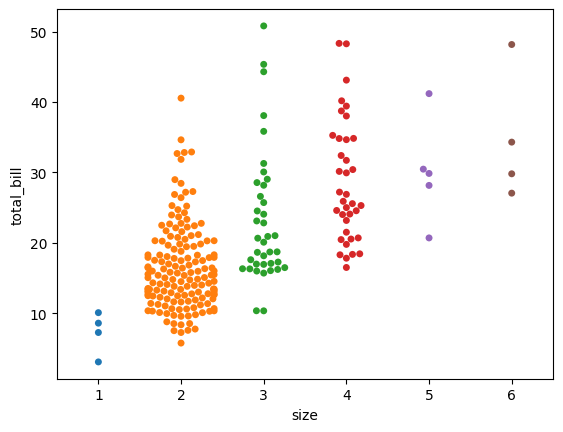

In [33]:
# 팁(tip),테이블 인원(size) 계산금액(total bill)사이 강하진 않지만 선형적 관계가 존재함
# 4번 문제에서 나온 size_tip 그래프에서 2~4명의 테이블인원에 가장 많은 tip 빈도가 보임
# size_total_bill 또한 동일하게 2~4명의 인원에 많은 빈도가 존재 
# 따라서 4인 테이블 확충 


sns.swarmplot("size","total_bill",data=tips_dataframe)
plt.show()


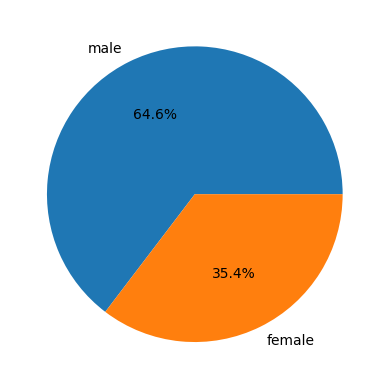

C:\Users\alstj\Anaconda3\envs\data\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


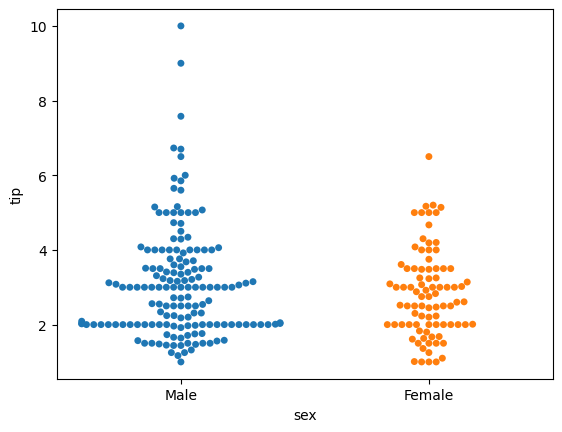

In [35]:
# 성별과 팁금액

# . 성별 구성
ps=[64,35]
labels=["male","female"]
plt.pie(ps,autopct='%.1f%%',labels=labels)
plt.show()

#  성별_팁금액
sns.swarmplot("sex","tip",data=tips_dataframe)
plt.show()

C:\Users\alstj\Anaconda3\envs\data\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


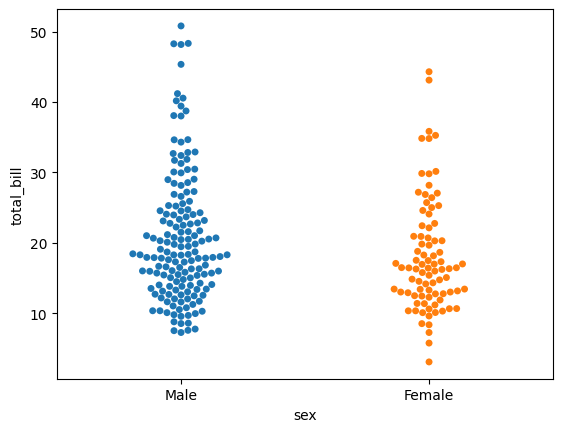

In [36]:
#  성별_계산금액
sns.swarmplot("sex","total_bill",data=tips_dataframe)
plt.show()

In [18]:
# 성별-팁,계산금액관련 방안
# 1.가게에 오는 성별은 남성이 여성보다 30% 정도 많음 
# 2.남녀모두 2~4원의 팁에, 15~22원 정도 사이에 계산금액이 가장 많은 빈도를 가지고 있음

# 15원,22원 사이의 메뉴 확충과 남성들이 선호하는 매뉴관련 데이터 분석을 다시 실시해 유사한 매뉴를 추가

더 하고싶은데 백신을 맞아서 몸이 너무 힘드네요 ㅠㅠ
-----
1.그래프를 두개로 나눠 흡연자가 있는 테이블, 없는 테이블의 계산금액을 비교   
2.요일(day)_성별(sex)의 관계를 시각화해 요일별 방문하는 성비파악